In [1]:
!git clone https://github.com/Dhanuja-Kavindra/deeplog.git

Cloning into 'deeplog'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 132 (delta 12), reused 22 (delta 10), pack-reused 106 (from 1)
Receiving objects: 100% (132/132), 24.33 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Updating files: 100% (18/18), done.


In [2]:
import sys
sys.path.append('/content/deeplog')

In [3]:
!pip install -r /content/deeplog/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.0 MB/s eta 0:00:00


In [4]:
%cd /content/deeplog/example

/content/deeplog/example


In [5]:
!python hdfs-preprocess.py

[2025-01-28 04:44:09,113][INFO]: Parsing file: ./data/HDFS/hdfs_abnormal.log
[2025-01-28 04:44:09,288][INFO]: Loaded 29.8% of log lines.
[2025-01-28 04:44:09,433][INFO]: Loaded 59.5% of log lines.
[2025-01-28 04:44:09,568][INFO]: Loaded 89.3% of log lines.
[2025-01-28 04:44:09,618][INFO]: Loaded 100.0% of log lines.
[2025-01-28 04:44:09,664][INFO]: load_data() finished!
[2025-01-28 04:44:10,343][INFO]: Processed 29.8% of log lines.
[2025-01-28 04:44:11,132][INFO]: Processed 59.5% of log lines.
[2025-01-28 04:44:12,044][INFO]: Processed 89.3% of log lines.
[2025-01-28 04:44:12,378][INFO]: Processed 100.0% of log lines.
[2025-01-28 04:44:14,474][INFO]: Output parse file
[2025-01-28 04:44:14,928][INFO]: Output main file for append
[2025-01-28 04:44:15,585][INFO]: lastestLindId: 33605
[2025-01-28 04:44:16,326][INFO]: rootNodePath: ./hdfs_result/rootNode.pkl
[2025-01-28 04:44:16,328][INFO]: logCluLPath: ./hdfs_result/logCluL.pkl
[2025-01-28 04:44:16,329][INFO]: Store objects done.
[2025-01-

In [14]:
import pandas as pd

output_dir = './hdfs_result'
df = pd.read_csv(f'{output_dir}/hdfs_normal1.log_structured.csv')

In [15]:
df['EventId'].unique().shape

(14,)

In [16]:
!python train.py --num-class 14 --num-candidates 2 --epochs 35 --window-size 3 --local True

Distributed training - False
[2025-01-28 04:52:04,837][DEBUG]: Distributed training - False
Number of gpus requested - 0, available - 0.
[2025-01-28 04:52:04,839][DEBUG]: Number of gpus requested - 0, available - 0.
Get train data loader
[2025-01-28 04:52:04,840][INFO]: Get train data loader
Number of session(train): 507226
[2025-01-28 04:52:05,170][INFO]: Number of session(train): 507226
Number of seqs(train): 507226
[2025-01-28 04:52:05,171][INFO]: Number of seqs(train): 507226
Processes 507226/507226 (100%) of train data
[2025-01-28 04:52:05,538][DEBUG]: Processes 507226/507226 (100%) of train data
Epoch [1/35], Train_loss: 0.0123
[2025-01-28 04:53:10,828][DEBUG]: Epoch [1/35], Train_loss: 0.0123
Epoch [2/35], Train_loss: 0.011
[2025-01-28 04:54:11,274][DEBUG]: Epoch [2/35], Train_loss: 0.011
Epoch [3/35], Train_loss: 0.011
[2025-01-28 04:55:09,144][DEBUG]: Epoch [3/35], Train_loss: 0.011
Epoch [4/35], Train_loss: 0.0109
[2025-01-28 04:56:07,476][DEBUG]: Epoch [4/35], Train_loss: 0.

In [17]:
!python predict.py --threshold 25

Streaming output truncated to the last 5000 lines.
[2025-01-28 05:58:34,431][DEBUG]: 1
3
[2025-01-28 05:58:34,431][DEBUG]: 3
Current device: cpu
[2025-01-28 05:58:34,431][INFO]: Current device: cpu
Deserializing the input data.
[2025-01-28 05:58:34,431][INFO]: Deserializing the input data.
Predict next template on this pattern series.
[2025-01-28 05:58:34,431][INFO]: Predict next template on this pattern series.
[]
[2025-01-28 05:58:34,431][INFO]: []
2
[2025-01-28 05:58:34,431][DEBUG]: 2
1
[2025-01-28 05:58:34,432][DEBUG]: 1
3
[2025-01-28 05:58:34,432][DEBUG]: 3
Current device: cpu
[2025-01-28 05:58:34,432][INFO]: Current device: cpu
Deserializing the input data.
[2025-01-28 05:58:34,432][INFO]: Deserializing the input data.
Predict next template on this pattern series.
[2025-01-28 05:58:34,432][INFO]: Predict next template on this pattern series.
[]
[2025-01-28 05:58:34,432][INFO]: []
2
[2025-01-28 05:58:34,432][DEBUG]: 2
1
[2025-01-28 05:58:34,432][DEBUG]: 1
3
[2025-01-28 05:58:34,43

# Visualization

Confusion Matrix

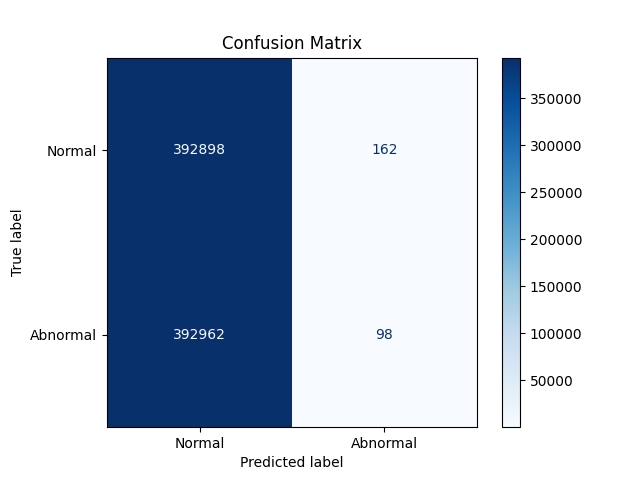

In [18]:
from IPython.display import Image, display
display(Image("confusion_matrix.png"))


ROC Curve

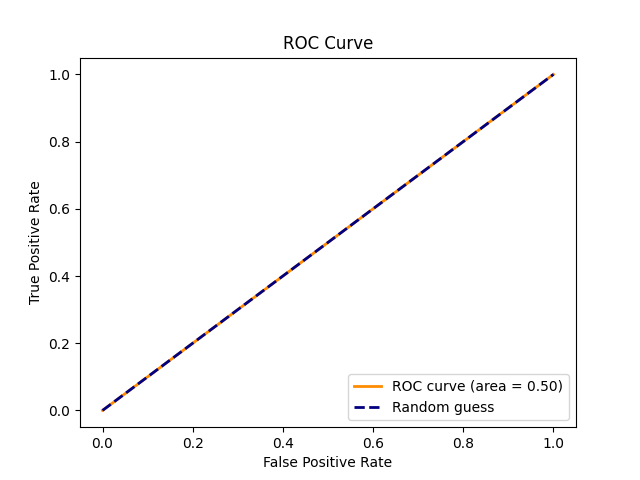

In [19]:
from IPython.display import Image, display
display(Image("roc_curve.png"))



Metric vs Threshold

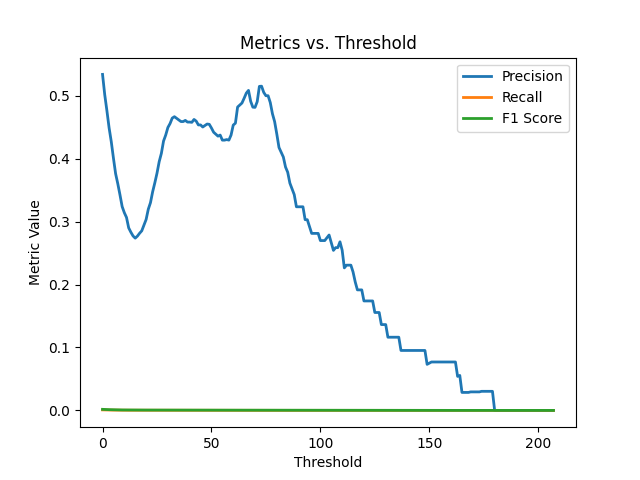

In [20]:
from IPython.display import Image, display
display(Image("metrics_vs_threshold.png"))